## Laboratorio: Aprendizaje Supervisado - Parte 1
### Problema de Regresión: California Housing

---

**Objetivo:** Predecir el valor mediano de viviendas en California utilizando diferentes modelos de regresión y optimizando sus hiperparámetros.

## 1. Importación de Librerías

Primero importamos todas las librerías necesarias para el análisis.

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset de scikit-learn
from sklearn.datasets import fetch_california_housing

# División de datos
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Modelos de regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Métricas de evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Carga y Exploración de Datos

Cargamos el dataset de California Housing y realizamos un análisis exploratorio inicial.

In [2]:
# Cargar el dataset como DataFrame
california = fetch_california_housing(as_frame=True)

# Crear DataFrame completo
df = california.frame

print(f"Dimensiones del dataset: {df.shape}")
print(f"\nNúmero de instancias: {df.shape[0]:,}")
print(f"Número de variables: {df.shape[1]}")
print(f"\nVariable objetivo: MedHouseVal (Valor mediano de vivienda en $100,000)")

Dimensiones del dataset: (20640, 9)

Número de instancias: 20,640
Número de variables: 9

Variable objetivo: MedHouseVal (Valor mediano de vivienda en $100,000)


In [3]:
# Visualizar las primeras filas
print("Primeras 5 filas del dataset:\n")
df.head()

Primeras 5 filas del dataset:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Información general del dataset
print("Información del dataset:\n")
df.info()

Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 2.1 Estadísticas Descriptivas

In [5]:
# Estadísticas descriptivas de todas las variables
print("Estadísticas descriptivas del dataset:\n")
df.describe().round(2)

Estadísticas descriptivas del dataset:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [6]:
# Verificar valores nulos
print("Valores nulos por columna:\n")
print(df.isnull().sum())

Valores nulos por columna:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### 2.2 Análisis de la Variable Objetivo

Analizamos la distribución de la variable objetivo (MedHouseVal) para entender su comportamiento.

In [7]:
# Estadísticas de la variable objetivo
print("Estadísticas de la variable objetivo (MedHouseVal):\n")
print(f"Media: ${df['MedHouseVal'].mean():.2f} (× $100,000)")
print(f"Mediana: ${df['MedHouseVal'].median():.2f} (× $100,000)")
print(f"Desviación estándar: ${df['MedHouseVal'].std():.2f} (× $100,000)")
print(f"Mínimo: ${df['MedHouseVal'].min():.2f} (× $100,000)")
print(f"Máximo: ${df['MedHouseVal'].max():.2f} (× $100,000)")

Estadísticas de la variable objetivo (MedHouseVal):

Media: $2.07 (× $100,000)
Mediana: $1.80 (× $100,000)
Desviación estándar: $1.15 (× $100,000)
Mínimo: $0.15 (× $100,000)
Máximo: $5.00 (× $100,000)


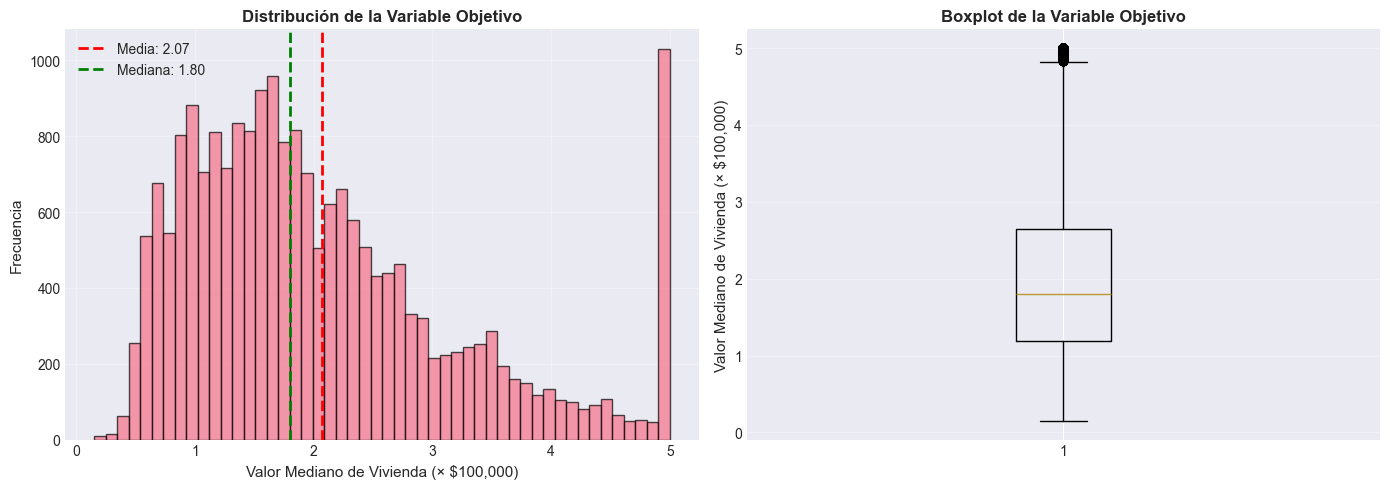


 Observaciones:
- La distribución presenta un sesgo hacia la derecha (asimetría positiva)
- Hay una concentración notable de valores en el límite superior (5.0)
- Se observan algunos valores atípicos en el extremo superior


In [8]:
# Visualización de la distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Valor Mediano de Vivienda (× $100,000)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Distribución de la Variable Objetivo', fontsize=12, fontweight='bold')
axes[0].axvline(df['MedHouseVal'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["MedHouseVal"].mean():.2f}')
axes[0].axvline(df['MedHouseVal'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["MedHouseVal"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['MedHouseVal'], vert=True)
axes[1].set_ylabel('Valor Mediano de Vivienda (× $100,000)', fontsize=11)
axes[1].set_title('Boxplot de la Variable Objetivo', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n Observaciones:")
print("- La distribución presenta un sesgo hacia la derecha (asimetría positiva)")
print("- Hay una concentración notable de valores en el límite superior (5.0)")
print("- Se observan algunos valores atípicos en el extremo superior")

### 2.3 Análisis de Correlaciones

Exploramos la relación entre las variables independientes y la variable objetivo.

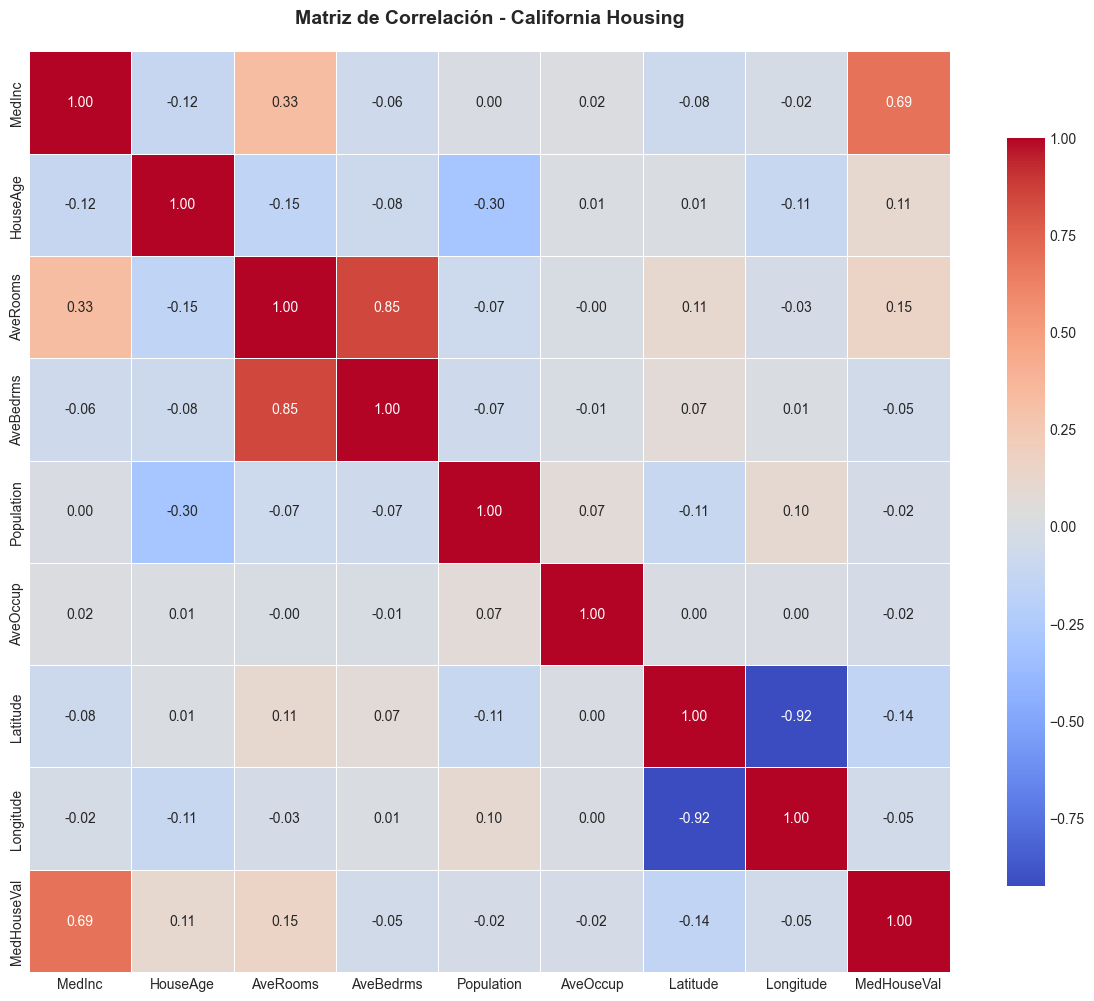

In [9]:
# Matriz de correlación
correlation_matrix = df.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - California Housing', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Correlación de variables con MedHouseVal:

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


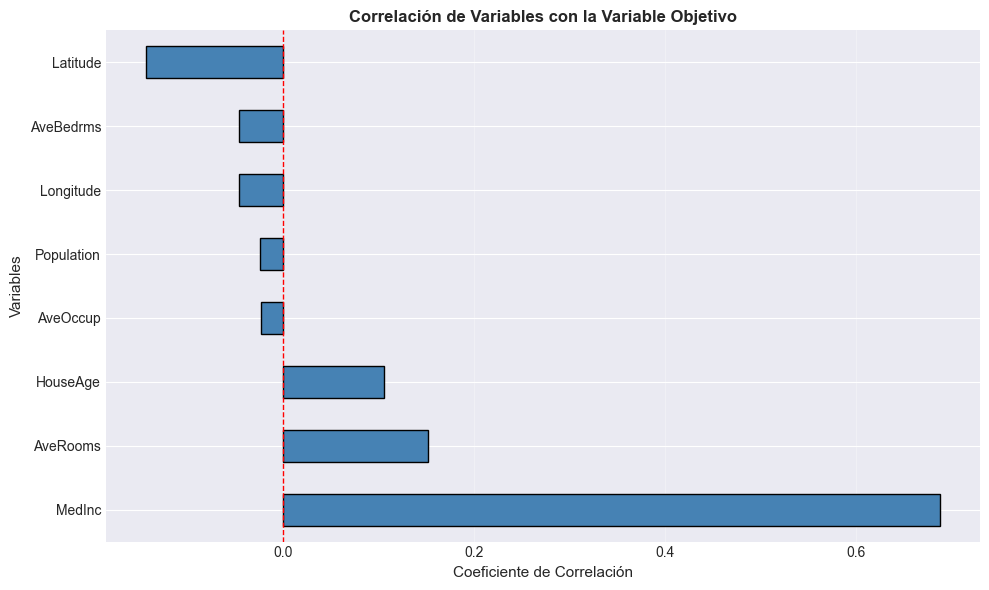


 Observaciones:
- MedInc (ingreso mediano) tiene la correlación más fuerte (0.69) con el precio
- Variables geográficas (Latitude, Longitude) también muestran correlación moderada
- AveOccup muestra la correlación más débil con el precio de vivienda


In [10]:
# Correlaciones con la variable objetivo (ordenadas)
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print("Correlación de variables con MedHouseVal:\n")
print(target_corr)

# Visualización de correlaciones con la variable objetivo
plt.figure(figsize=(10, 6))
target_corr[target_corr.index != 'MedHouseVal'].plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Coeficiente de Correlación', fontsize=11)
plt.ylabel('Variables', fontsize=11)
plt.title('Correlación de Variables con la Variable Objetivo', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n Observaciones:")
print("- MedInc (ingreso mediano) tiene la correlación más fuerte (0.69) con el precio")
print("- Variables geográficas (Latitude, Longitude) también muestran correlación moderada")
print("- AveOccup muestra la correlación más débil con el precio de vivienda")

### 2.4 Visualización de Relaciones Clave

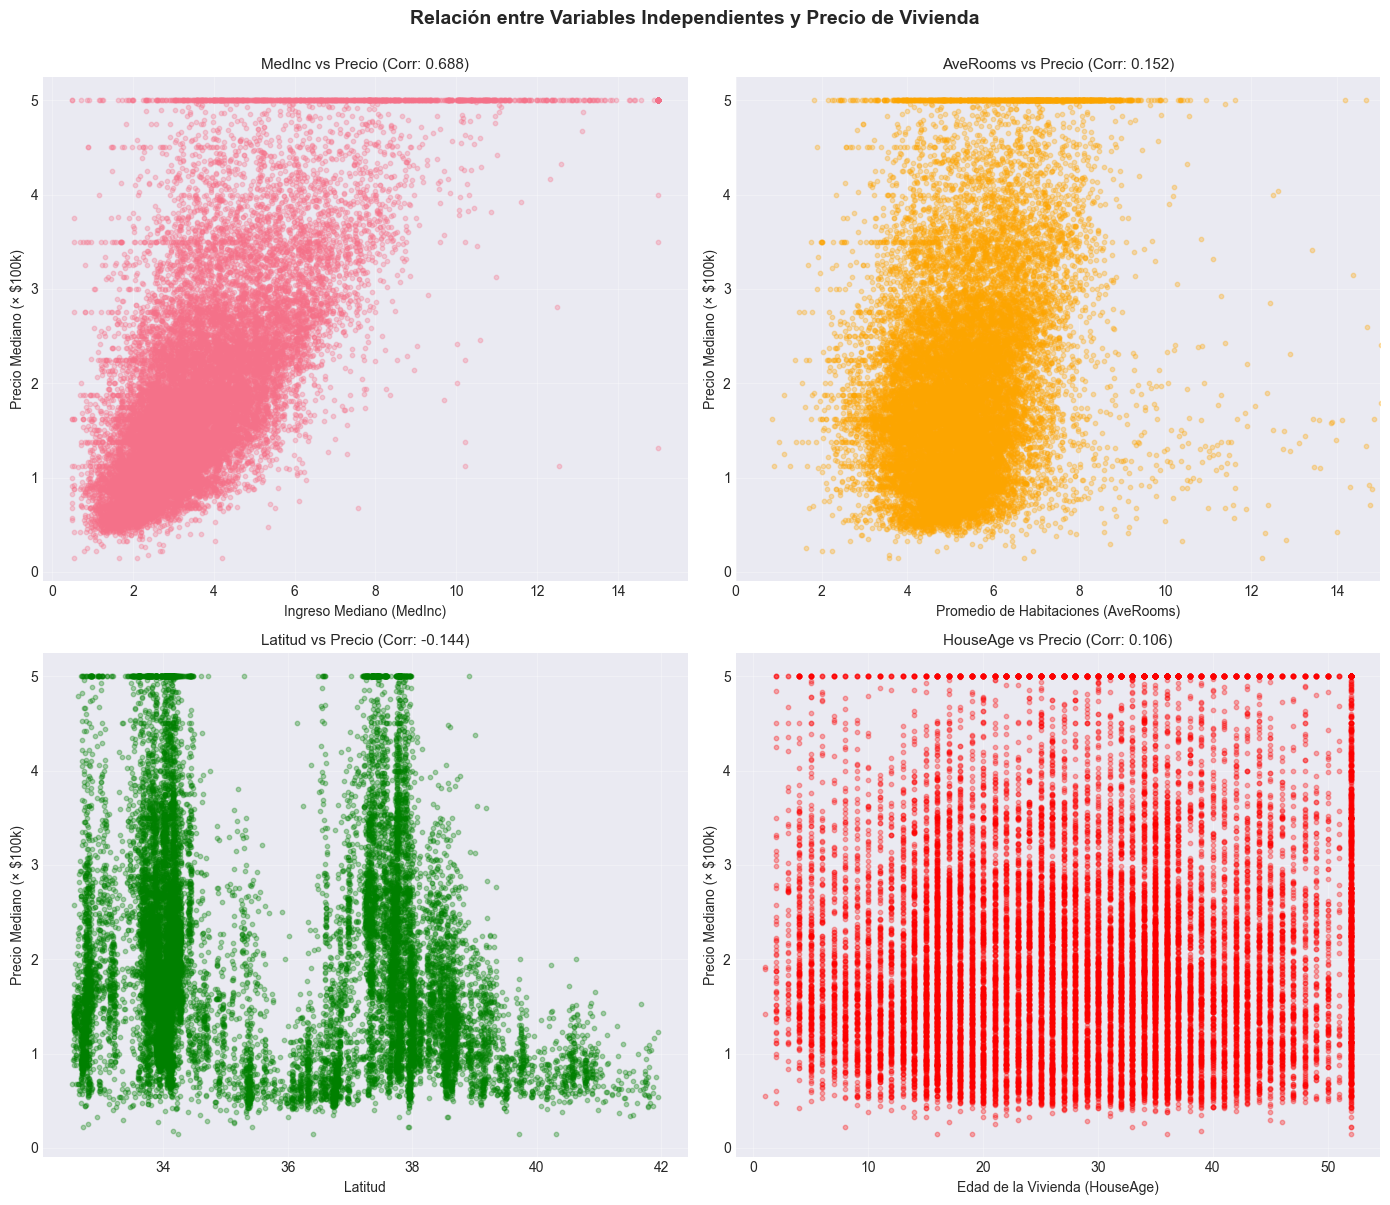

In [11]:
# Scatter plots de las variables más correlacionadas
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Relación entre Variables Independientes y Precio de Vivienda', 
             fontsize=14, fontweight='bold', y=1.00)

# MedInc vs MedHouseVal
axes[0, 0].scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3, s=10)
axes[0, 0].set_xlabel('Ingreso Mediano (MedInc)', fontsize=10)
axes[0, 0].set_ylabel('Precio Mediano (× $100k)', fontsize=10)
axes[0, 0].set_title(f'MedInc vs Precio (Corr: {correlation_matrix.loc["MedInc", "MedHouseVal"]:.3f})', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# AveRooms vs MedHouseVal
axes[0, 1].scatter(df['AveRooms'], df['MedHouseVal'], alpha=0.3, s=10, color='orange')
axes[0, 1].set_xlabel('Promedio de Habitaciones (AveRooms)', fontsize=10)
axes[0, 1].set_ylabel('Precio Mediano (× $100k)', fontsize=10)
axes[0, 1].set_title(f'AveRooms vs Precio (Corr: {correlation_matrix.loc["AveRooms", "MedHouseVal"]:.3f})', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(0, 15)  # Limitar para mejor visualización

# Latitude vs MedHouseVal
axes[1, 0].scatter(df['Latitude'], df['MedHouseVal'], alpha=0.3, s=10, color='green')
axes[1, 0].set_xlabel('Latitud', fontsize=10)
axes[1, 0].set_ylabel('Precio Mediano (× $100k)', fontsize=10)
axes[1, 0].set_title(f'Latitud vs Precio (Corr: {correlation_matrix.loc["Latitude", "MedHouseVal"]:.3f})', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# HouseAge vs MedHouseVal
axes[1, 1].scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.3, s=10, color='red')
axes[1, 1].set_xlabel('Edad de la Vivienda (HouseAge)', fontsize=10)
axes[1, 1].set_ylabel('Precio Mediano (× $100k)', fontsize=10)
axes[1, 1].set_title(f'HouseAge vs Precio (Corr: {correlation_matrix.loc["HouseAge", "MedHouseVal"]:.3f})', fontsize=11)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Separación de Datos

Dividimos el dataset en conjuntos de entrenamiento (80%) y prueba (20%).

**Justificación de parámetros:**
- `test_size=0.2`: Proporción estándar que permite tener suficientes datos para entrenar (80%) manteniendo un conjunto de prueba representativo (20%).
- `random_state=42`: Valor fijo para asegurar reproducibilidad de los resultados en múltiples ejecuciones.

In [12]:
# Separar características (X) y variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para prueba, 80% para entrenamiento
    random_state=RANDOM_STATE  # Para reproducibilidad
)

print("División de datos completada:")
print(f"\nConjunto de entrenamiento: {X_train.shape[0]:,} instancias ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]:,} instancias ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nNúmero de características: {X_train.shape[1]}")

División de datos completada:

Conjunto de entrenamiento: 16,512 instancias (80.0%)
Conjunto de prueba: 4,128 instancias (20.0%)

Número de características: 8


## 4. Entrenamiento Inicial de Modelos

Entrenamos los tres modelos con sus hiperparámetros por defecto para establecer una línea base.

### 4.1 Regresión Lineal

In [13]:
# Entrenar modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("=" * 60)
print("REGRESIÓN LINEAL - Resultados Iniciales")
print("=" * 60)
print(f"MAE (Error Absoluto Medio):     ${mae_lr:.4f} (× $100,000)")
print(f"RMSE (Raíz del Error Cuadrático): ${rmse_lr:.4f} (× $100,000)")
print(f"R² (Coeficiente de Determinación): {r2_lr:.4f}")
print("=" * 60)
print(f"\n✓ El modelo explica el {r2_lr*100:.2f}% de la varianza en los datos")

REGRESIÓN LINEAL - Resultados Iniciales
MAE (Error Absoluto Medio):     $0.5332 (× $100,000)
RMSE (Raíz del Error Cuadrático): $0.7456 (× $100,000)
R² (Coeficiente de Determinación): 0.5758

✓ El modelo explica el 57.58% de la varianza en los datos


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### 4.2 Árbol de Decisión

In [14]:
# Entrenar modelo de Árbol de Decisión
dt_model = DecisionTreeRegressor(random_state=RANDOM_STATE)
dt_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = dt_model.predict(X_test)

# Calcular métricas
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("=" * 60)
print("ÁRBOL DE DECISIÓN - Resultados Iniciales")
print("=" * 60)
print(f"MAE (Error Absoluto Medio):     ${mae_dt:.4f} (× $100,000)")
print(f"RMSE (Raíz del Error Cuadrático): ${rmse_dt:.4f} (× $100,000)")
print(f"R² (Coeficiente de Determinación): {r2_dt:.4f}")
print("=" * 60)
print(f"\n✓ El modelo explica el {r2_dt*100:.2f}% de la varianza en los datos")

ÁRBOL DE DECISIÓN - Resultados Iniciales
MAE (Error Absoluto Medio):     $0.4558 (× $100,000)
RMSE (Raíz del Error Cuadrático): $0.7069 (× $100,000)
R² (Coeficiente de Determinación): 0.6187

✓ El modelo explica el 61.87% de la varianza en los datos


### 4.3 Random Forest

In [15]:
# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=" * 60)
print("RANDOM FOREST - Resultados Iniciales")
print("=" * 60)
print(f"MAE (Error Absoluto Medio):     ${mae_rf:.4f} (× $100,000)")
print(f"RMSE (Raíz del Error Cuadrático): ${rmse_rf:.4f} (× $100,000)")
print(f"R² (Coeficiente de Determinación): {r2_rf:.4f}")
print("=" * 60)
print(f"\n✓ El modelo explica el {r2_rf*100:.2f}% de la varianza en los datos")

RANDOM FOREST - Resultados Iniciales
MAE (Error Absoluto Medio):     $0.3276 (× $100,000)
RMSE (Raíz del Error Cuadrático): $0.5057 (× $100,000)
R² (Coeficiente de Determinación): 0.8049

✓ El modelo explica el 80.49% de la varianza en los datos


### 4.4 Comparación de Resultados Iniciales


Comparación de Modelos (Hiperparámetros por Defecto):

           Modelo      MAE     RMSE       R²
 Regresión Lineal 0.533200 0.745581 0.575788
Árbol de Decisión 0.455762 0.706900 0.618663
    Random Forest 0.327599 0.505694 0.804850


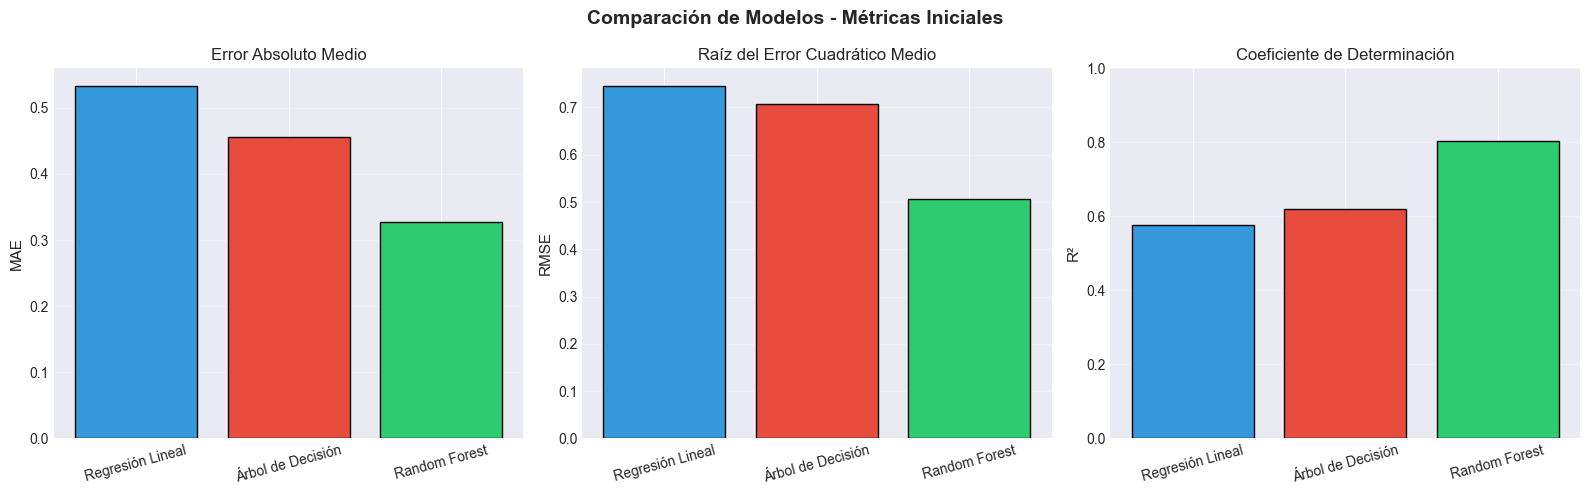


 Observaciones Iniciales:
- Random Forest muestra el mejor desempeño inicial en todas las métricas
- El Árbol de Decisión tiene un R² relativamente bajo, sugiriendo posible sobreajuste
- La Regresión Lineal ofrece un rendimiento moderado pero consistente


In [16]:
# Crear DataFrame con resultados iniciales
resultados_iniciales = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R²': [r2_lr, r2_dt, r2_rf]
})

print("\nComparación de Modelos (Hiperparámetros por Defecto):\n")
print(resultados_iniciales.to_string(index=False))

# Visualización de comparación
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Comparación de Modelos - Métricas Iniciales', fontsize=14, fontweight='bold')

modelos = resultados_iniciales['Modelo']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# MAE
axes[0].bar(modelos, resultados_iniciales['MAE'], color=colors, edgecolor='black')
axes[0].set_ylabel('MAE', fontsize=11)
axes[0].set_title('Error Absoluto Medio', fontsize=12)
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3, axis='y')

# RMSE
axes[1].bar(modelos, resultados_iniciales['RMSE'], color=colors, edgecolor='black')
axes[1].set_ylabel('RMSE', fontsize=11)
axes[1].set_title('Raíz del Error Cuadrático Medio', fontsize=12)
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3, axis='y')

# R²
axes[2].bar(modelos, resultados_iniciales['R²'], color=colors, edgecolor='black')
axes[2].set_ylabel('R²', fontsize=11)
axes[2].set_title('Coeficiente de Determinación', fontsize=12)
axes[2].tick_params(axis='x', rotation=15)
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n Observaciones Iniciales:")
print("- Random Forest muestra el mejor desempeño inicial en todas las métricas")
print("- El Árbol de Decisión tiene un R² relativamente bajo, sugiriendo posible sobreajuste")
print("- La Regresión Lineal ofrece un rendimiento moderado pero consistente")

## 5. Optimización de Hiperparámetros

Utilizamos **GridSearchCV** para optimizar los hiperparámetros de los modelos basados en árboles.
- prueba todas las combinaciones posibles

**Justificación:**
- **GridSearchCV**: Búsqueda exhaustiva en un espacio de hiperparámetros definido. Ideal cuando el espacio de búsqueda no es muy grande.
- **Validación cruzada (cv=5)**: 5-fold cross-validation para evaluar el rendimiento de manera robusta y evitar sobreajuste.
- **scoring='r2'**: Métrica principal para optimización, ya que mide qué tan bien el modelo explica la varianza.

### No utilize: 
- **RandomizedSearchCV**: Es una técnica para evaluar qué tan bien generaliza un modelo. El más común es el k-fold: divide los datos en k partes, entrena k veces usando k-1 partes y evalúa en la parte restante, luego promedia los resultados.
   - RandomizedSearchCV sería mejor si:
      - Tienes muchos hiperparámetros con rangos muy amplios
      - El tiempo de cómputo es una limitante importante

### 5.1 Optimización del Árbol de Decisión

Parámetros a optimizar:
- `max_depth`: Profundidad máxima del árbol (controla complejidad y sobreajuste)
- `min_samples_split`: Número mínimo de muestras para dividir un nodo
- `min_samples_leaf`: Número mínimo de muestras en una hoja
- `max_features`: Número de características a considerar para cada división

In [17]:
# Definir espacio de búsqueda para Árbol de Decisión
param_grid_dt = {
   'max_depth': [5, 10, 15, 20, None],
   'min_samples_split': [2, 5, 10, 20],
   'min_samples_leaf': [1, 2, 4, 8],
   'max_features': ['sqrt', 'log2', None]
}

print("Iniciando búsqueda de hiperparámetros para Árbol de Decisión...")
print(f"Combinaciones a evaluar: {len(param_grid_dt['max_depth']) * len(param_grid_dt['min_samples_split']) * len(param_grid_dt['min_samples_leaf']) * len(param_grid_dt['max_features'])}")
print("\nEsto puede tomar varios minutos...")

# GridSearchCV para Árbol de Decisión
grid_dt = GridSearchCV(
   estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),
   param_grid=param_grid_dt,
   cv=5,  # 5-fold cross-validation
   scoring='r2',  # Métrica de optimización
   n_jobs=-1,  # Usar todos los núcleos disponibles
   verbose=1
)

grid_dt.fit(X_train, y_train)

Iniciando búsqueda de hiperparámetros para Árbol de Decisión...
Combinaciones a evaluar: 240

Esto puede tomar varios minutos...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [18]:
# Mejores hiperparámetros y resultados
print("\n" + "=" * 60)
print("ÁRBOL DE DECISIÓN - Optimización Completa")
print("=" * 60)
print("\nMejores hiperparámetros encontrados:")
for param, value in grid_dt.best_params_.items():
   print(f"  • {param}: {value}")

print(f"\nMejor R² en validación cruzada: {grid_dt.best_score_:.4f}")

# Evaluar en conjunto de prueba
y_pred_dt_opt = grid_dt.predict(X_test)
mae_dt_opt = mean_absolute_error(y_test, y_pred_dt_opt)
rmse_dt_opt = np.sqrt(mean_squared_error(y_test, y_pred_dt_opt))
r2_dt_opt = r2_score(y_test, y_pred_dt_opt)

print("\nResultados en conjunto de prueba:")
print(f"  • MAE:  ${mae_dt_opt:.4f} (× $100,000)")
print(f"  • RMSE: ${rmse_dt_opt:.4f} (× $100,000)")
print(f"  • R²:   {r2_dt_opt:.4f}")
print("=" * 60)


ÁRBOL DE DECISIÓN - Optimización Completa

Mejores hiperparámetros encontrados:
  • max_depth: 15
  • max_features: None
  • min_samples_leaf: 8
  • min_samples_split: 20

Mejor R² en validación cruzada: 0.7201

Resultados en conjunto de prueba:
  • MAE:  $0.4052 (× $100,000)
  • RMSE: $0.6058 (× $100,000)
  • R²:   0.7200


### 5.2 Optimización del Random Forest

Parámetros a optimizar:
- `n_estimators`: Número de árboles en el bosque
- `max_depth`: Profundidad máxima de cada árbol
- `min_samples_split`: Número mínimo de muestras para dividir un nodo
- `min_samples_leaf`: Número mínimo de muestras en una hoja
- `max_features`: Número de características consideradas en cada división

In [19]:
# Definir espacio de búsqueda para Random Forest
param_grid_rf = {
   'n_estimators': [50, 100, 200],
   'max_depth': [10, 15, 20, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['sqrt', 'log2']
}

print("Iniciando búsqueda de hiperparámetros para Random Forest...")
print(f"Combinaciones a evaluar: {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf']) * len(param_grid_rf['max_features'])}")
print("\nEsto puede tomar varios minutos...")

# GridSearchCV para Random Forest
grid_rf = GridSearchCV(
   estimator=RandomForestRegressor(random_state=RANDOM_STATE),
   param_grid=param_grid_rf,
   cv=5,  # 5-fold cross-validation
   scoring='r2',  # Métrica de optimización
   n_jobs=-1,  # Usar todos los núcleos disponibles
   verbose=1
)

grid_rf.fit(X_train, y_train)

Iniciando búsqueda de hiperparámetros para Random Forest...
Combinaciones a evaluar: 216

Esto puede tomar varios minutos...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [20]:
# Mejores hiperparámetros y resultados
print("\n" + "=" * 60)
print("RANDOM FOREST - Optimización Completa")
print("=" * 60)
print("\nMejores hiperparámetros encontrados:")
for param, value in grid_rf.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nMejor R² en validación cruzada: {grid_rf.best_score_:.4f}")

# Evaluar en conjunto de prueba
y_pred_rf_opt = grid_rf.predict(X_test)
mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
rmse_rf_opt = np.sqrt(mean_squared_error(y_test, y_pred_rf_opt))
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)

print("\nResultados en conjunto de prueba:")
print(f"  • MAE:  ${mae_rf_opt:.4f} (× $100,000)")
print(f"  • RMSE: ${rmse_rf_opt:.4f} (× $100,000)")
print(f"  • R²:   {r2_rf_opt:.4f}")
print("=" * 60)


RANDOM FOREST - Optimización Completa

Mejores hiperparámetros encontrados:
  • max_depth: 20
  • max_features: log2
  • min_samples_leaf: 1
  • min_samples_split: 2
  • n_estimators: 100

Mejor R² en validación cruzada: 0.8165

Resultados en conjunto de prueba:
  • MAE:  $0.3225 (× $100,000)
  • RMSE: $0.4929 (× $100,000)
  • R²:   0.8146


## 6. Evaluación y Comparación Final

### 6.1 Justificación de Métricas Utilizadas

**MAE (Mean Absolute Error):**
- Mide el error promedio absoluto entre predicciones y valores reales
- Fácil de interpretar en las unidades originales (× $100,000)
- Menos sensible a valores atípicos que RMSE

**RMSE (Root Mean Squared Error):**
- Penaliza más los errores grandes debido al cuadrado
- Útil cuando errores grandes son especialmente indeseables
- Mismas unidades que la variable objetivo

**R² (Coeficiente de Determinación):**
- Mide qué proporción de la varianza es explicada por el modelo (0 a 1)
- Permite comparar modelos independientemente de la escala
- R² = 1 indica ajuste perfecto, R² = 0 indica que el modelo no es mejor que la media

In [21]:
# Crear DataFrame de comparación final
comparacion_final = pd.DataFrame({
   'Modelo': ['Regresión Lineal', 'Árbol de Decisión (Inicial)', 'Árbol de Decisión (Optimizado)', 
            'Random Forest (Inicial)', 'Random Forest (Optimizado)'],
   'MAE': [mae_lr, mae_dt, mae_dt_opt, mae_rf, mae_rf_opt],
   'RMSE': [rmse_lr, rmse_dt, rmse_dt_opt, rmse_rf, rmse_rf_opt],
   'R²': [r2_lr, r2_dt, r2_dt_opt, r2_rf, r2_rf_opt]
})

print("\n" + "=" * 80)
print("COMPARACIÓN FINAL DE TODOS LOS MODELOS")
print("=" * 80)
print("\n", comparacion_final.to_string(index=False))
print("\n" + "=" * 80)


COMPARACIÓN FINAL DE TODOS LOS MODELOS

                         Modelo      MAE     RMSE       R²
              Regresión Lineal 0.533200 0.745581 0.575788
   Árbol de Decisión (Inicial) 0.455762 0.706900 0.618663
Árbol de Decisión (Optimizado) 0.405179 0.605761 0.719975
       Random Forest (Inicial) 0.327599 0.505694 0.804850
    Random Forest (Optimizado) 0.322510 0.492939 0.814570



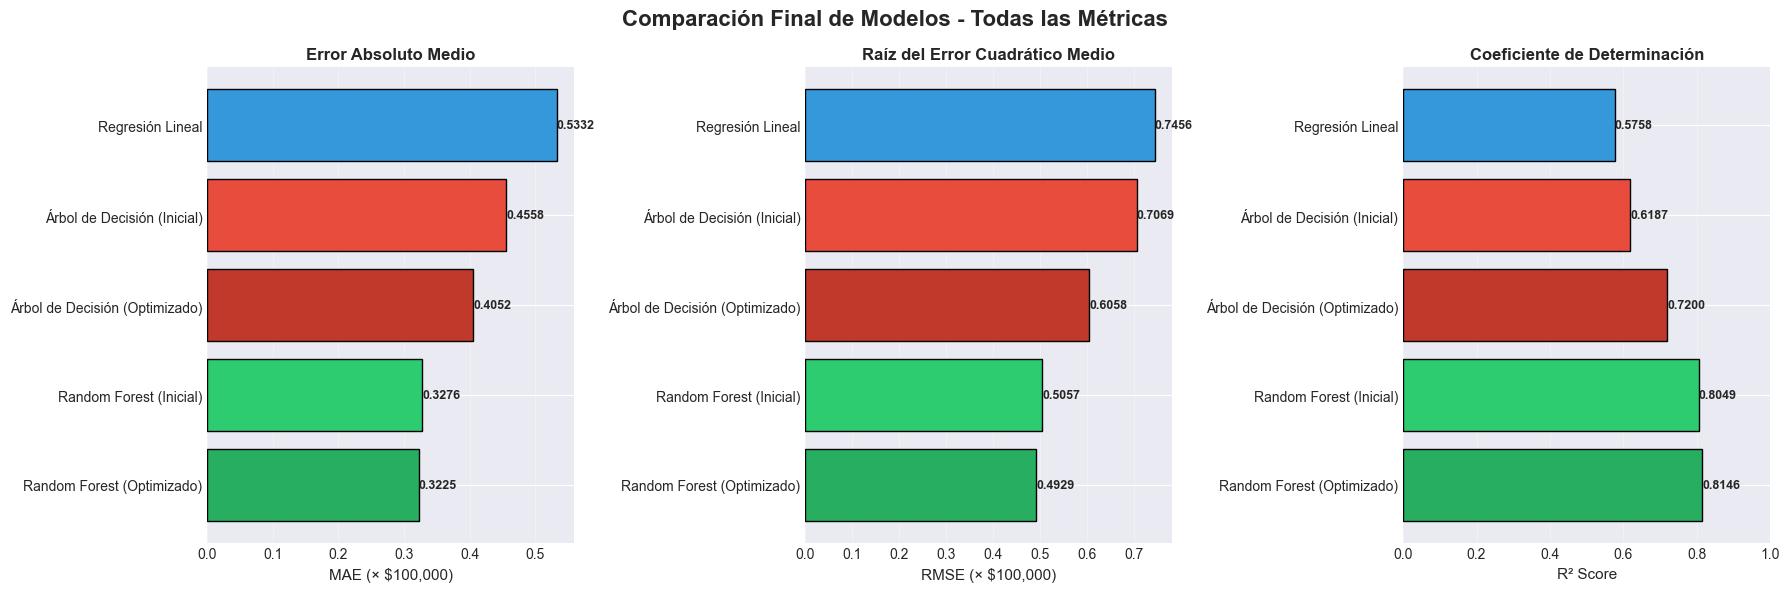

In [22]:
# Visualización comparativa final
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación Final de Modelos - Todas las Métricas', fontsize=16, fontweight='bold')

modelos = comparacion_final['Modelo']
colors_extended = ['#3498db', '#e74c3c', '#c0392b', '#2ecc71', '#27ae60']

# MAE
bars1 = axes[0].barh(modelos, comparacion_final['MAE'], color=colors_extended, edgecolor='black')
axes[0].set_xlabel('MAE (× $100,000)', fontsize=11)
axes[0].set_title('Error Absoluto Medio', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()
# Añadir valores
for i, bar in enumerate(bars1):
   width = bar.get_width()
   axes[0].text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
               ha='left', va='center', fontsize=9, fontweight='bold')

# RMSE
bars2 = axes[1].barh(modelos, comparacion_final['RMSE'], color=colors_extended, edgecolor='black')
axes[1].set_xlabel('RMSE (× $100,000)', fontsize=11)
axes[1].set_title('Raíz del Error Cuadrático Medio', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()
# Añadir valores
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
                ha='left', va='center', fontsize=9, fontweight='bold')

# R²
bars3 = axes[2].barh(modelos, comparacion_final['R²'], color=colors_extended, edgecolor='black')
axes[2].set_xlabel('R² Score', fontsize=11)
axes[2].set_title('Coeficiente de Determinación', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='x')
axes[2].set_xlim([0, 1])
axes[2].invert_yaxis()
# Añadir valores
for i, bar in enumerate(bars3):
    width = bar.get_width()
    axes[2].text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
                ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.2 Comparación de Predicciones vs Valores Reales

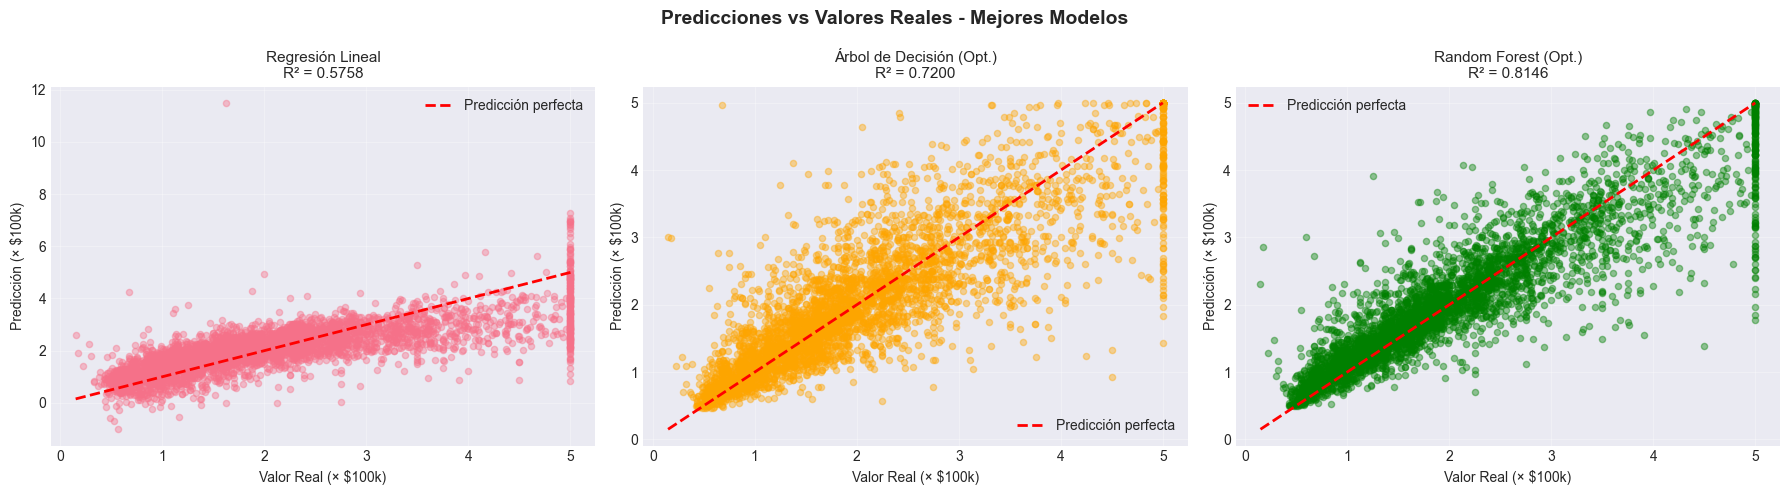

In [23]:
# Visualizar predicciones vs valores reales para los mejores modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Predicciones vs Valores Reales - Mejores Modelos', fontsize=14, fontweight='bold')

# Regresión Lineal
axes[0].scatter(y_test, y_pred_lr, alpha=0.4, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valor Real (× $100k)', fontsize=10)
axes[0].set_ylabel('Predicción (× $100k)', fontsize=10)
axes[0].set_title(f'Regresión Lineal\nR² = {r2_lr:.4f}', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Árbol de Decisión Optimizado
axes[1].scatter(y_test, y_pred_dt_opt, alpha=0.4, s=20, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
axes[1].set_xlabel('Valor Real (× $100k)', fontsize=10)
axes[1].set_ylabel('Predicción (× $100k)', fontsize=10)
axes[1].set_title(f'Árbol de Decisión (Opt.)\nR² = {r2_dt_opt:.4f}', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Random Forest Optimizado
axes[2].scatter(y_test, y_pred_rf_opt, alpha=0.4, s=20, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción perfecta')
axes[2].set_xlabel('Valor Real (× $100k)', fontsize=10)
axes[2].set_ylabel('Predicción (× $100k)', fontsize=10)
axes[2].set_title(f'Random Forest (Opt.)\nR² = {r2_rf_opt:.4f}', fontsize=11)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()